Problem Statement:

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

Minimum Requirements:

It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

In [629]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install klib
import klib
import warnings
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
pd.pandas.set_option('display.max_columns',None)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [630]:
data = pd.read_csv('https://raw.githubusercontent.com/Jacob68/House-Price-Prediction/main/train-chennai-sale.csv')
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [631]:
data.shape

(7109, 22)

# *Understand the dataset*

In [632]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [633]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [634]:
data.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# *Removing unwanted columns or feature*

In [635]:
data = data.drop(['PRT_ID','REG_FEE','COMMIS'],axis = 'columns')

In [636]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [637]:
data.dtypes

AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
SALES_PRICE        int64
dtype: object

In [638]:
data.AREA.values[2]

'Adyar'

In [639]:
data.INT_SQFT.values[20]

1069

In [640]:
data.STREET.values[2]

'Gravel'

In [641]:
cat = [x for x in data.columns if data[x].dtype =='O']
print(len(cat))
cat

9


['AREA',
 'DATE_SALE',
 'SALE_COND',
 'PARK_FACIL',
 'DATE_BUILD',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [642]:
num = [x for x in data.columns if data[x].dtype !='O']
print(len(num))
num

10


['INT_SQFT',
 'DIST_MAINROAD',
 'N_BEDROOM',
 'N_BATHROOM',
 'N_ROOM',
 'QS_ROOMS',
 'QS_BATHROOM',
 'QS_BEDROOM',
 'QS_OVERALL',
 'SALES_PRICE']

# *Data Cleaning*

In [643]:
data.isna().sum()

AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
SALES_PRICE       0
dtype: int64

In [644]:
features_with_na = [features for features in data.columns if data[features].isnull().sum()>0]
for feature in features_with_na:
  print(feature,np.round(data[feature].isnull().mean(),4), '% missing values')

N_BEDROOM 0.0001 % missing values
N_BATHROOM 0.0007 % missing values
QS_OVERALL 0.0068 % missing values


# *Filling Null and missing Values*

In [645]:
data['N_BEDROOM'] = data['N_BEDROOM'].fillna(data['N_BEDROOM'].mode()[0])
data['N_BATHROOM'] = data['N_BATHROOM'].fillna(data['N_BATHROOM'].mode()[0])
data['QS_OVERALL'] = data['QS_OVERALL'].fillna(data['QS_OVERALL'].mean())

In [646]:
data.isna().sum()

AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
dtype: int64

In [647]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

In [648]:
#Numeric features
numeric_feature = data.select_dtypes(exclude=['object'])
numeric_feature.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [649]:
#Categorical features 
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
categorical_features

['AREA',
 'DATE_SALE',
 'SALE_COND',
 'PARK_FACIL',
 'DATE_BUILD',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']


# *Correcting Spelling mistakes*

In [650]:
data.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [651]:
data['AREA'] = data['AREA'].replace(['TNagar','Chrompt','Chrmpet','Karapakam','Ana Nagar','Chormpet','Adyr','Velchery','Ann Nagar','KKNagar'],
                                          ['T Nagar','Chrompet','Chrompet','Karapakkam','Anna Nagar','Chrompet','Adyar','Velachery','Anna Nagar','KK Nagar'])


In [652]:
data.AREA.value_counts()

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [653]:
data.INT_SQFT.describe()

count    7109.000000
mean     1382.073006
std       457.410902
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

**No outliers were deducted in this data set**

In [654]:
data.DATE_SALE.describe()

count           7109
unique          2798
top       06-10-2009
freq              12
Name: DATE_SALE, dtype: object

In [655]:
data.DIST_MAINROAD.describe()

count    7109.000000
mean       99.603179
std        57.403110
min         0.000000
25%        50.000000
50%        99.000000
75%       148.000000
max       200.000000
Name: DIST_MAINROAD, dtype: float64

**No Outliers detected**

In [656]:
data.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

In [657]:
data.N_BATHROOM.value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

In [658]:
data.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

# *Unique value*

**Utility**

In [659]:
data.UTILITY_AVAIL.value_counts

<bound method IndexOpsMixin.value_counts of 0        AllPub
1        AllPub
2           ELO
3       NoSewr 
4        AllPub
         ...   
7104        ELO
7105     NoSeWa
7106     NoSeWa
7107        ELO
7108        ELO
Name: UTILITY_AVAIL, Length: 7109, dtype: object>

In [660]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [661]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].replace(['NoSeWa','NoSewr ','All Pub'],
                                                      ['No Sewage','No Sewer','AllPub'])

In [662]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'No Sewer', 'No Sewage'], dtype=object)

**Parking facility**

In [663]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [664]:
data.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [665]:
data['PARK_FACIL'] = data['PARK_FACIL'].replace(['Noo'],'No')

In [666]:
data.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [667]:
data.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

**Buildtype**

In [668]:
len(data.DATE_BUILD.unique())

5808

In [669]:
data.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [670]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [671]:
data['BUILDTYPE'] = data['BUILDTYPE'].replace(['Other'],'Others')
data['BUILDTYPE'] = data['BUILDTYPE'].replace(['Comercial'],'Commercial')

In [672]:
data.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [673]:
data.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

**Street**

In [674]:
data.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [675]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [676]:
data['STREET'] = data['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'])


In [677]:
data.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [678]:
data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

**MZZONE**

In [679]:
data.MZZONE.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [680]:
data.MZZONE.unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

**SALE CONDITION**

In [681]:
data.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [682]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [683]:
data['SALE_COND'] = data['SALE_COND'].replace(['Adj Land','Ab Normal','Partiall','PartiaLl'],
                                    ['AdjLand','AbNormal','Partial','Partial'])

In [684]:
data.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [685]:
data.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

**UTILITY AVAILABLE**

In [686]:
data.UTILITY_AVAIL.value_counts()

AllPub       1887
No Sewage    1871
No Sewer     1829
ELO          1522
Name: UTILITY_AVAIL, dtype: int64

In [687]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'No Sewer', 'No Sewage'], dtype=object)

In [688]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].replace({'All Pub':'AllPub',"NoSewr ":"NoSewr"})

In [689]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'No Sewer', 'No Sewage'], dtype=object)

In [690]:
data.UTILITY_AVAIL.value_counts()

AllPub       1887
No Sewage    1871
No Sewer     1829
ELO          1522
Name: UTILITY_AVAIL, dtype: int64

In [691]:
data.head(5)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


In [692]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   object 
 1   INT_SQFT       7109 non-null   int64  
 2   DATE_SALE      7109 non-null   object 
 3   DIST_MAINROAD  7109 non-null   int64  
 4   N_BEDROOM      7109 non-null   float64
 5   N_BATHROOM     7109 non-null   float64
 6   N_ROOM         7109 non-null   int64  
 7   SALE_COND      7109 non-null   object 
 8   PARK_FACIL     7109 non-null   object 
 9   DATE_BUILD     7109 non-null   object 
 10  BUILDTYPE      7109 non-null   object 
 11  UTILITY_AVAIL  7109 non-null   object 
 12  STREET         7109 non-null   object 
 13  MZZONE         7109 non-null   object 
 14  QS_ROOMS       7109 non-null   float64
 15  QS_BATHROOM    7109 non-null   float64
 16  QS_BEDROOM     7109 non-null   float64
 17  QS_OVERALL     7109 non-null   float64
 18  SALES_PR

In [693]:
data.dtypes.value_counts()

object     9
float64    6
int64      4
dtype: int64

In [694]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE
0,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000
1,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770
2,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200
3,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290
4,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250


# *DERIVING NEW FEATURES*

In [695]:
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])

In [696]:
data['DATE_BUILD'] = pd.to_datetime(data["DATE_BUILD"])

In [697]:
data.dtypes.value_counts()

object            7
float64           6
int64             4
datetime64[ns]    2
dtype: int64

In [698]:
data['SALE_YEAR'] = data['DATE_SALE'].dt.year
data['BUILD_YEAR'] = data['DATE_BUILD'].dt.year

In [699]:
data.dtypes.value_counts()

object            7
int64             6
float64           6
datetime64[ns]    2
dtype: int64

In [700]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SALE_YEAR,BUILD_YEAR
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979


In [701]:
data['AGE'] = data['SALE_YEAR']- data['BUILD_YEAR']

In [702]:
data.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SALE_YEAR,BUILD_YEAR,AGE
0,Karapakkam,1004,2011-04-05,131,1.0,1.0,3,AbNormal,Yes,1967-05-15,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,2006-12-19,26,2.0,1.0,5,AbNormal,No,1995-12-22,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,2012-04-02,70,1.0,1.0,3,AbNormal,Yes,1992-09-02,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,2010-03-13,14,3.0,2.0,5,Family,No,1988-03-18,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,2009-05-10,84,1.0,1.0,3,AbNormal,Yes,1979-10-13,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [703]:
data = data.drop(['DATE_SALE','DATE_BUILD'],axis=1)

In [704]:
data.head(5)

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,SALE_YEAR,BUILD_YEAR,AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,2011,1967,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,2006,1995,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,2012,1992,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,2010,1988,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,2009,1979,30


In [705]:
data = data.drop(['SALE_YEAR','BUILD_YEAR'],axis=1)

In [706]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


# *Exploratory Data Analysis*

In [707]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [708]:
data.AREA.nunique()

7

In [709]:
area = data.AREA.value_counts().reset_index(name='count')
area['percentage'] = round(area['count'] / data.shape[0] * 100, 2)
area

,index,count,percentage
0,Chrompet,1702,23.94
1,Karapakkam,1366,19.22
2,KK Nagar,997,14.02
3,Velachery,981,13.80
4,Anna Nagar,788,11.08
5,Adyar,774,10.89
6,T Nagar,501,7.05


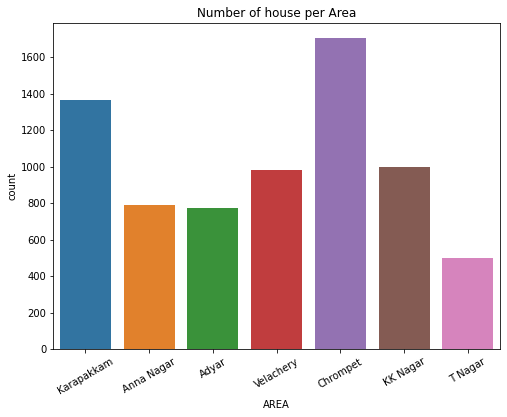

In [710]:
plt.figure(figsize= (8,6))
sns.countplot(x='AREA', data=data)
plt.title("Number of house per Area")
plt.xticks(rotation=30)
plt.show()

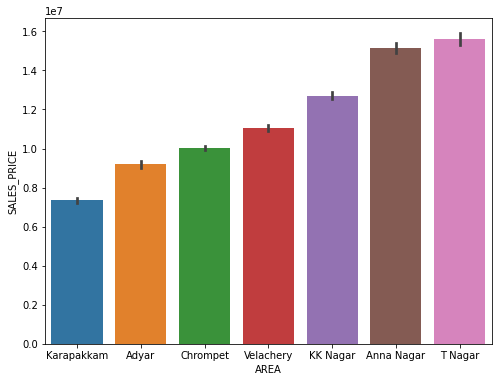

In [711]:
plt.figure(figsize= (8,6))
sns.barplot(x="AREA",y="SALES_PRICE",data=data,order=data.groupby("AREA")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["AREA"])

This has a linear relationship so we will go for label encoding

In [712]:
data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

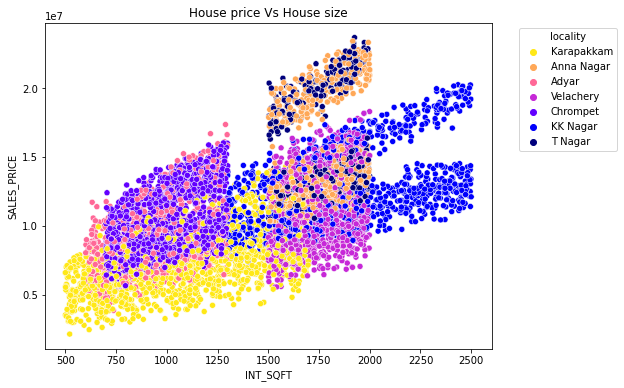

In [713]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='INT_SQFT', y='SALES_PRICE', hue='AREA', palette='gnuplot2_r')
plt.title("House price Vs House size")
plt.legend(title='locality',bbox_to_anchor=(1.05, 1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


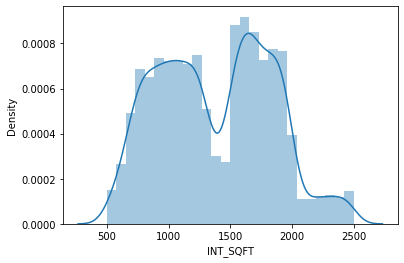

In [714]:
sns.distplot(data['INT_SQFT'])

From the above graph we can conclude a linear relationshp with out need for transforming the data.

In [715]:
#Distance form Main Road

data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

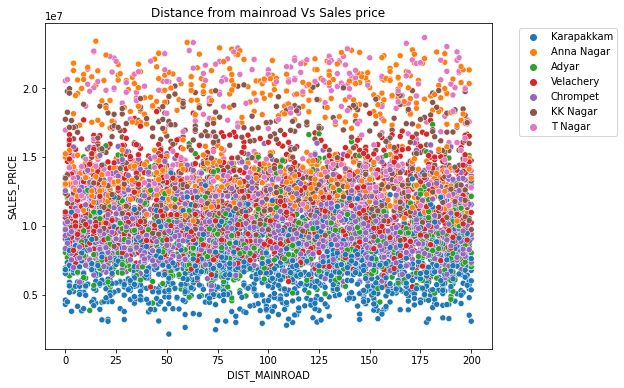

In [716]:
#distance from mainroad vs sales price
plt.figure(figsize=(8,6))
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE', data=data, hue='AREA')
plt.title("Distance from mainroad Vs Sales price")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


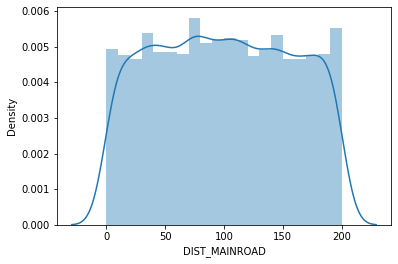

In [717]:
sns.distplot(data['DIST_MAINROAD'])

This one does not have a linear relationship, but this data doesnot affect overall model so we can ignore this data.

In [718]:
#Bedrooms

data.N_BEDROOM.value_counts()

1.0    3796
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64

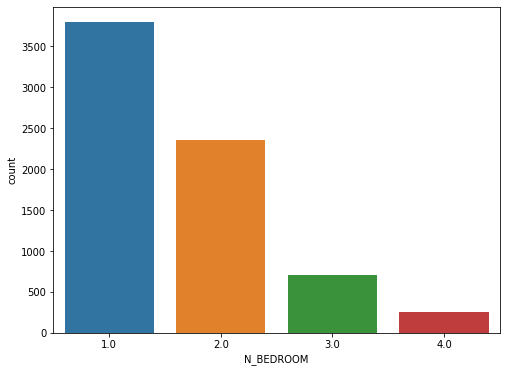

In [719]:
#plot the count of bedrooms
plt.figure(figsize=(8,6))
sns.countplot(x=data["N_BEDROOM"], data=data)
plt.show()

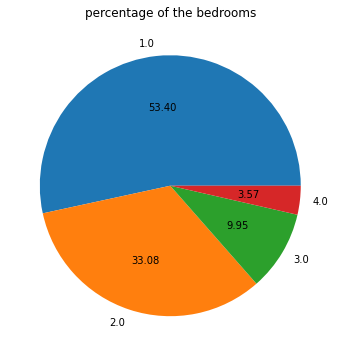

In [720]:
#find the percentage of the bedrooms
plt.figure(figsize=(8,6))
data.N_BEDROOM.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("percentage of the bedrooms")
plt.ylabel('')
plt.show()

The single bedroom has most of the houses followed by the double bedroom,There are -53.47% of the houses had only single bedrooms ,32.98% of the houses had two bedrooms ,9.96% of the houses has 3 bedrooms ,3.59% of the houses has 4 bedrooms

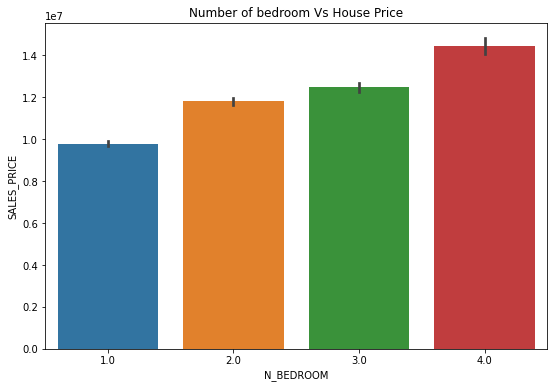

In [721]:
#number of bedroom wise sales price graph
plt.figure(figsize=(9,6))
sns.barplot(data=data, x='N_BEDROOM',y='SALES_PRICE')
plt.title("Number of bedroom Vs House Price")
plt.show()

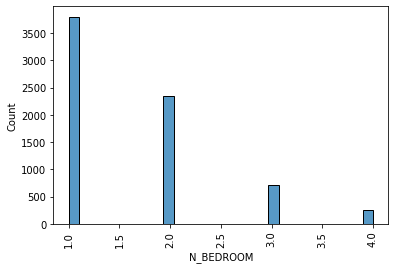

In [722]:
sns.histplot(data['N_BEDROOM'])
plt.xticks(rotation='vertical')
plt.show()

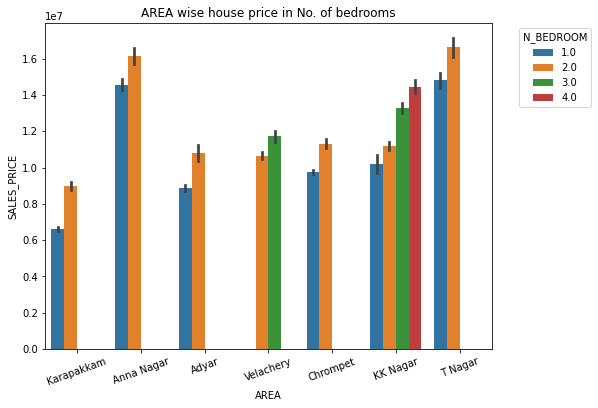

In [723]:
plt.figure(figsize=(8,6))
sns.barplot(x='AREA',y='SALES_PRICE', data=data, hue='N_BEDROOM')
plt.title("AREA wise house price in No. of bedrooms")
plt.xticks(rotation=20)
plt.legend(title='N_BEDROOM',bbox_to_anchor=(1.05,1))
plt.show()

It Has a linear relationship so, No transformation required

In [724]:
#Bathrooms

data.columns
data.N_BATHROOM.value_counts()

1.0    5594
2.0    1515
Name: N_BATHROOM, dtype: int64

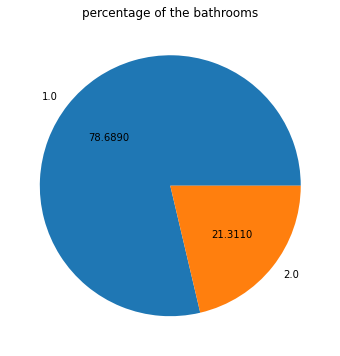

In [725]:
plt.figure(figsize=(8,6))
data.N_BATHROOM.value_counts().plot(kind='pie', autopct="%.4f")
plt.title("percentage of the bathrooms")
plt.ylabel('')
plt.show()

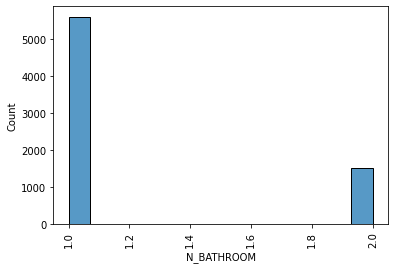

In [726]:
sns.histplot(data['N_BATHROOM'])
plt.xticks(rotation='vertical')
plt.show()

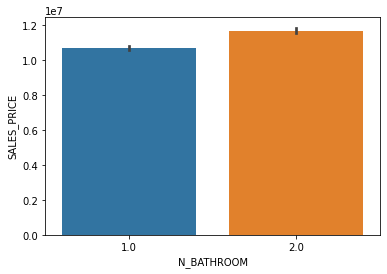

In [727]:
sns.barplot(data = data,x = 'N_BATHROOM', y = 'SALES_PRICE')

Most of the house has atleas 1 bathroom,Very less number of houses have more than one bathroom. Number of bathroom and sales price have a very linear relationship, so no transformation is required

In [728]:
#Rooms

data.N_ROOM.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: N_ROOM, dtype: int64

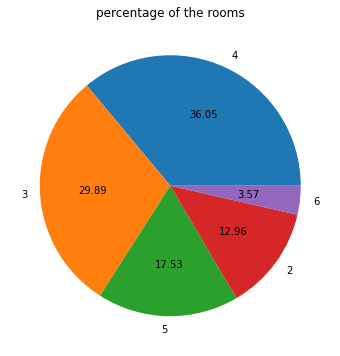

In [729]:
#find the percentage of the Rooms
plt.figure(figsize=(8,6))
data.N_ROOM.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("percentage of the rooms")
plt.ylabel('')
plt.show()

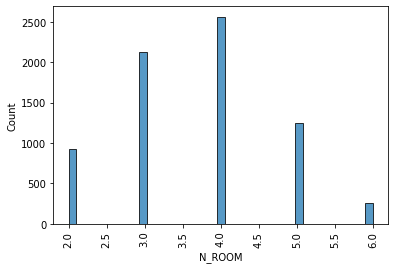

In [730]:
sns.histplot(data['N_ROOM'])
plt.xticks(rotation='vertical')
plt.show()

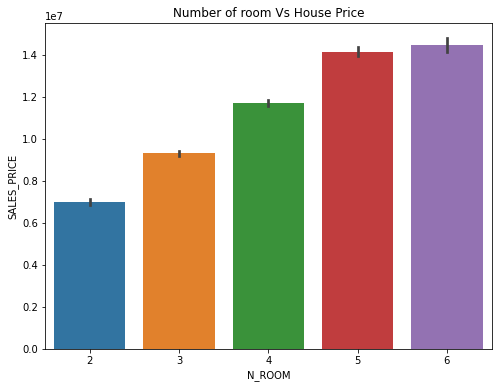

In [731]:
#number of rooms vs house price
plt.figure(figsize=(8,6))
sns.barplot(data=data, x='N_ROOM',y='SALES_PRICE')
plt.title("Number of room Vs House Price")
plt.show()

number of rooms and sales price has a linear relationship,so no transformation required

In [732]:
#Sale_cond

data.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

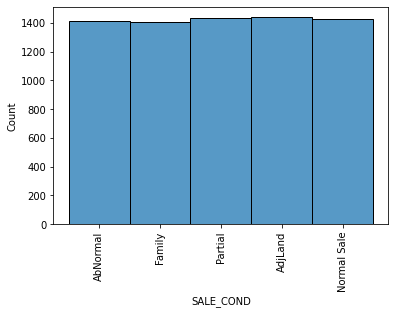

In [733]:
sns.histplot(data['SALE_COND'])
plt.xticks(rotation='vertical')
plt.show()

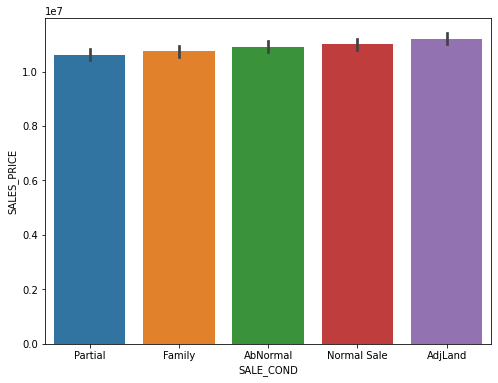

In [734]:
plt.figure(figsize= (8,6))
sns.barplot(x="SALE_COND",y="SALES_PRICE",data=data,order=data.groupby("SALE_COND")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["SALE_COND"])


THIS DATA SET HAS A LINEAR RELATIONSHIP SO WE WILL STICK WITH LABEL ENCODING

In [735]:
#Parking facilities

data.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

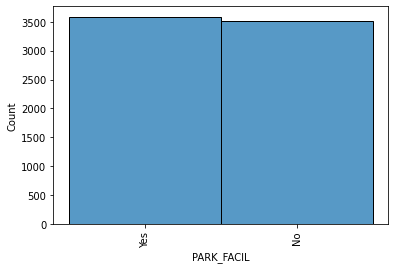

In [736]:
sns.histplot(data['PARK_FACIL'])
plt.xticks(rotation='vertical')
plt.show()

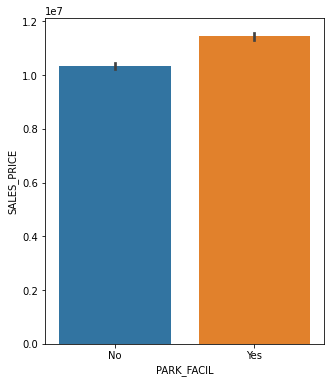

In [737]:
plt.figure(figsize= (5,6))
sns.barplot(x="PARK_FACIL", y ="SALES_PRICE",data=data,order=data.groupby("PARK_FACIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["PARK_FACIL"])

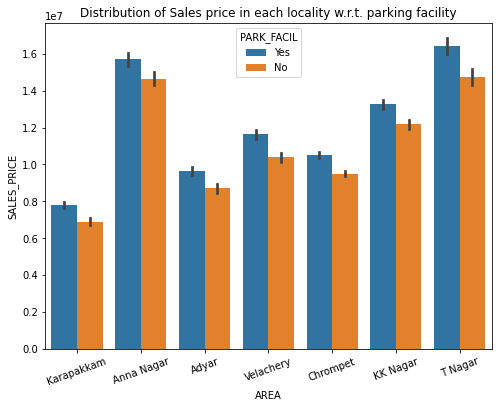

In [738]:
plt.figure(figsize=(8,6))
sns.barplot(x='AREA', y='SALES_PRICE', data=data, hue='PARK_FACIL')
plt.xticks(rotation=20)
plt.title("Distribution of Sales price in each locality w.r.t. parking facility")
plt.show()

IT HAS A LINEAR RELATIONSHIP SO WE WILL DO LABEL ENCODING

In [739]:
#Build type

data.BUILDTYPE.value_counts()

House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

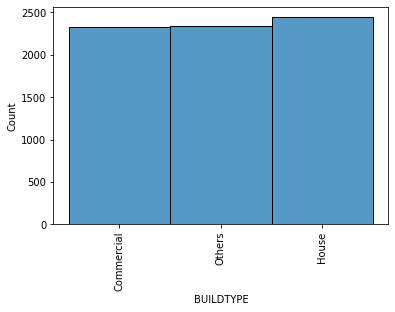

In [740]:
sns.histplot(data['BUILDTYPE'])
plt.xticks(rotation='vertical')
plt.show()

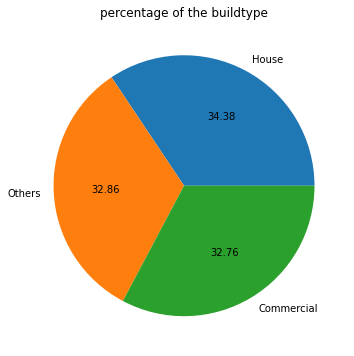

In [741]:
plt.figure(figsize=(8,6))
data.BUILDTYPE.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("percentage of the buildtype")
plt.ylabel('')
plt.show()

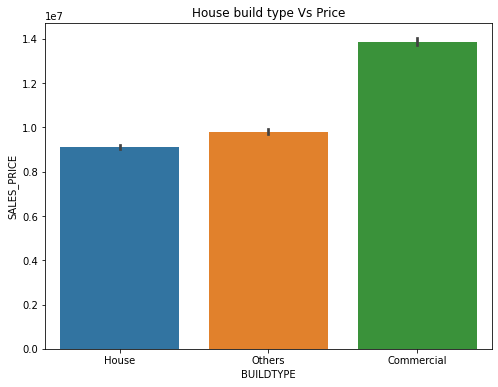

In [742]:
plt.figure(figsize=(8,6))
sns.barplot(x='BUILDTYPE', y='SALES_PRICE', data=data, order=data[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index().BUILDTYPE)
plt.title("House build type Vs Price")
plt.show()

IN BUILDTYPE WE CAN CONCLUDE THAT THERE IS NO LINEAR RELATIONSHIP, SO WE WILL DO ONEHOT ENCODING

In [743]:
#UTILITY_AVAIL

data.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL',
       'STREET', 'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM',
       'QS_OVERALL', 'SALES_PRICE', 'AGE'],
      dtype='object')

In [744]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
AGE              0
dtype: int64

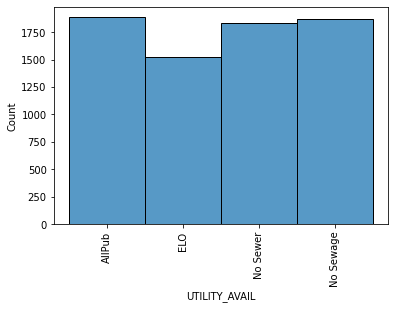

In [745]:
sns.histplot(data['UTILITY_AVAIL'])
plt.xticks(rotation='vertical')
plt.show()

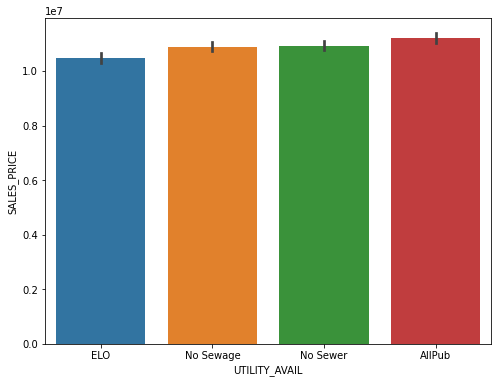

In [746]:
plt.figure(figsize= (8,6))
sns.barplot(x="UTILITY_AVAIL",y="SALES_PRICE",data=data,order=data.groupby("UTILITY_AVAIL")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["UTILITY_AVAIL"])

In [747]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'No Sewer', 'No Sewage'], dtype=object)

In [748]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
AGE              0
dtype: int64

UTILITY AVAILABLITY ALSO HAVE LINEAR RELATIONSHIP ,SO WE WILL STICK WITH LINEAR ENCODING

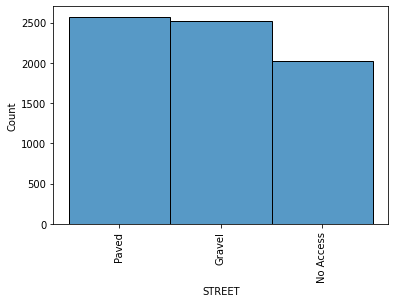

In [749]:
#Street
sns.histplot(data['STREET'])
plt.xticks(rotation='vertical')
plt.show()

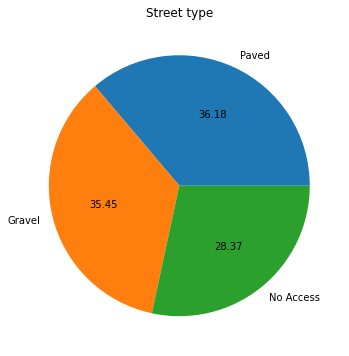

In [750]:
street = data.STREET.value_counts()
plt.figure(figsize= (8,6))
street.plot(kind='pie', autopct="%.2f")
plt.title("Street type")
plt.ylabel('')
plt.show()

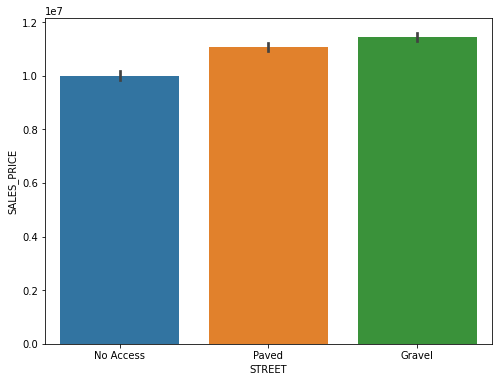

In [751]:
plt.figure(figsize= (8,6))
sns.barplot(x="STREET",y="SALES_PRICE",data=data,order=data.groupby("STREET")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["STREET"])


Has a linear relationship Label Encoding

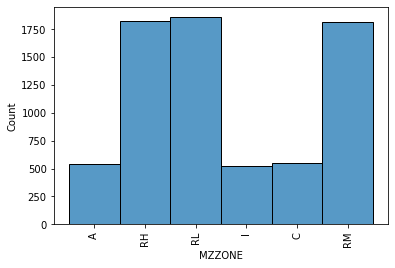

In [752]:
#MZZONE
sns.histplot(data['MZZONE'])
plt.xticks(rotation='vertical')
plt.show()

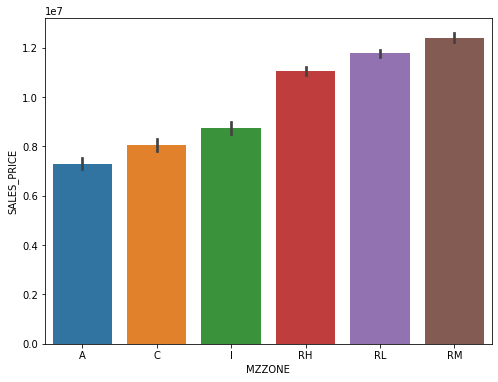

In [753]:
plt.figure(figsize= (8,6))
sns.barplot(x="MZZONE",y="SALES_PRICE",data=data,order=data.groupby("MZZONE")["SALES_PRICE"].mean().reset_index().sort_values("SALES_PRICE")["MZZONE"])


Has a linear relationship Label Encoding

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


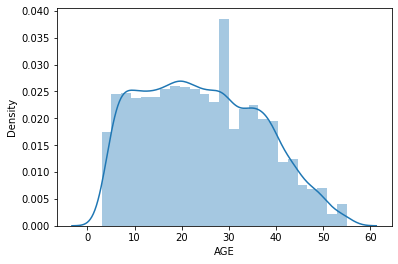

In [754]:
#AGE

sns.distplot(data['AGE'])

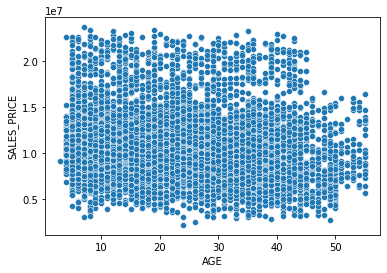

In [755]:
sns.scatterplot(data = data,x='AGE',y='SALES_PRICE')

THIS FEATURE CAN BE IGNORED AS THIS DOSENT AFFECT THE DATA AND IT DOES NOT HAVE A LINEAR RELATIONSHIP

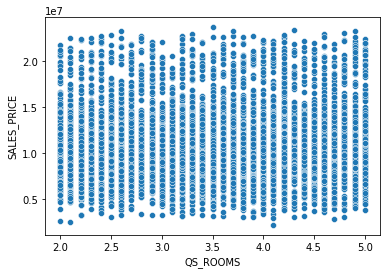

In [756]:
#QS_ROOMS,BEDROOM AND BATHROOM

sns.scatterplot(data=data,x = 'QS_ROOMS',y = 'SALES_PRICE')

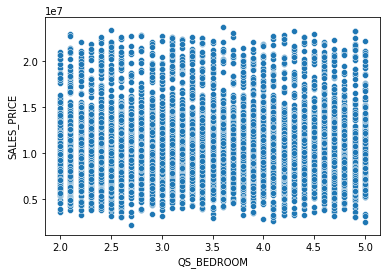

In [757]:
sns.scatterplot(data=data,x = 'QS_BEDROOM',y = 'SALES_PRICE')

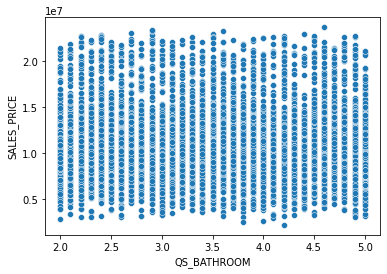

In [758]:
sns.scatterplot(data=data,x='QS_BATHROOM',y='SALES_PRICE')

No linear relationship We can ignore this features as it doesn't affect our target

QS_OVERALL

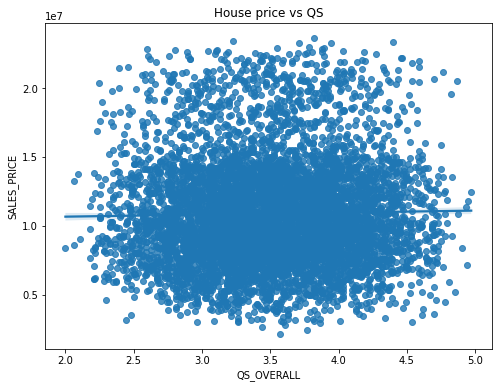

In [759]:
plt.figure(figsize= (8,6))

sns.regplot(data=data, x='QS_OVERALL', y='SALES_PRICE')
plt.title("House price vs QS")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


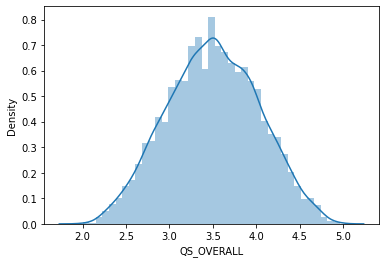

In [760]:
sns.distplot(data['QS_OVERALL'])

No linear relationship We can ignore this feature as it doesn't affect our target

In [761]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
AGE              0
dtype: int64

In [762]:
data.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.013989,0.612125,-0.012610
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.017255,0.018783,-0.003559
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.014245,0.330987,-0.045873
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.007961,0.108834,-0.020403
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.015418,0.602760,-0.033316
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.516147,0.021967,0.019718
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.549056,-0.011377,0.021700
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.628168,0.018804,-0.017971
QS_OVERALL,0.013989,-0.017255,0.014245,0.007961,0.015418,0.516147,0.549056,0.628168,1.000000,0.020485,0.012517
SALES_PRICE,0.612125,0.018783,0.330987,0.108834,0.602760,0.021967,-0.011377,0.018804,0.020485,1.000000,-0.118842


In [763]:
data.corr()['SALES_PRICE']

INT_SQFT         0.612125
DIST_MAINROAD    0.018783
N_BEDROOM        0.330987
N_BATHROOM       0.108834
N_ROOM           0.602760
QS_ROOMS         0.021967
QS_BATHROOM     -0.011377
QS_BEDROOM       0.018804
QS_OVERALL       0.020485
SALES_PRICE      1.000000
AGE             -0.118842
Name: SALES_PRICE, dtype: float64

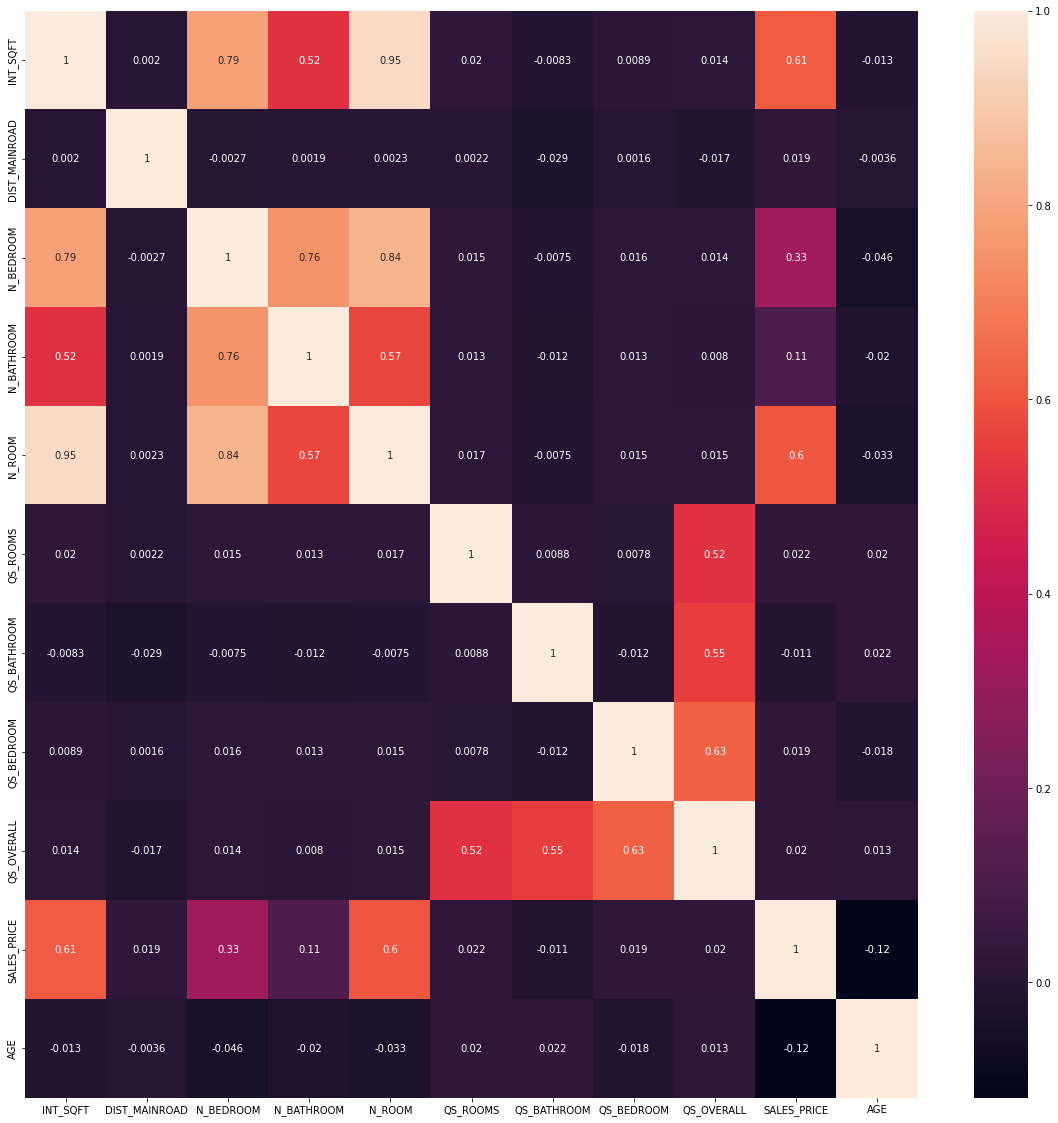

In [764]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [765]:
data.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,7600000,44
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,21717770,11
2,Adyar,909,70,1.0,1.0,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13159200,20
3,Velachery,1855,14,3.0,2.0,5,Family,No,Others,No Sewer,Paved,I,4.7,3.9,3.6,4.010,9630290,22
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7406250,30


In [766]:
data.tail()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,No,Others,ELO,No Access,RM,3.0,2.2,2.4,2.52,5353000,49
7105,Velachery,1897,52,3.0,2.0,5,Family,Yes,Others,No Sewage,No Access,RH,3.6,4.5,3.3,3.92,10818480,9
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,No,House,No Sewage,Gravel,I,4.3,4.2,2.9,3.84,8351410,28
7107,Karapakkam,787,40,1.0,1.0,2,Partial,Yes,Commercial,ELO,Paved,RL,4.6,3.8,4.1,4.16,8507000,32
7108,Velachery,1896,156,3.0,2.0,5,Partial,Yes,Others,ELO,Paved,I,3.1,3.5,4.3,3.64,9976480,44


In [767]:
cat = [x for x in data.columns if data[x].dtype =='O']
print(len(cat))
cat

7


['AREA',
 'SALE_COND',
 'PARK_FACIL',
 'BUILDTYPE',
 'UTILITY_AVAIL',
 'STREET',
 'MZZONE']

In [768]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
AGE              0
dtype: int64

# *Encoding the features*

In [769]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
data["AREA"]= data["AREA"].map({'Karapakkam':1,'Adyar': 2,'Chrompet' :3,'Velachery' :4,'KK Nagar':5,'Anna Nagar': 6, 'T Nagar':7})

In [770]:
data["SALE_COND"]= data["SALE_COND"].map({'Partial':1,'Family':2, 'AbNormal':3,'Normal Sale':4,'AdjLand':5})

In [771]:
data['PARK_FACIL'] = data['PARK_FACIL'].map({'Yes':2,'No':1})

In [772]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
AGE              0
dtype: int64

In [773]:
data.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'No Sewer', 'No Sewage'], dtype=object)

In [774]:
data['UTILITY_AVAIL'] = data['UTILITY_AVAIL'].map({'ELO':1,'No Sewage':2,'No Sewer':3,'AllPub':4})

In [775]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
AGE              0
dtype: int64

In [776]:
data['STREET'] = data['STREET'].map({'No Access':1,'Paved':3,'Gravel':4})

In [777]:
data["MZZONE"]= data["MZZONE"].map({'A':1,'C':2, 'I':3,'RH':5,'RL':6,'RM':7})

In [778]:
data.isnull().sum()

AREA             0
INT_SQFT         0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
SALES_PRICE      0
AGE              0
dtype: int64

# *Distribution of the Data*

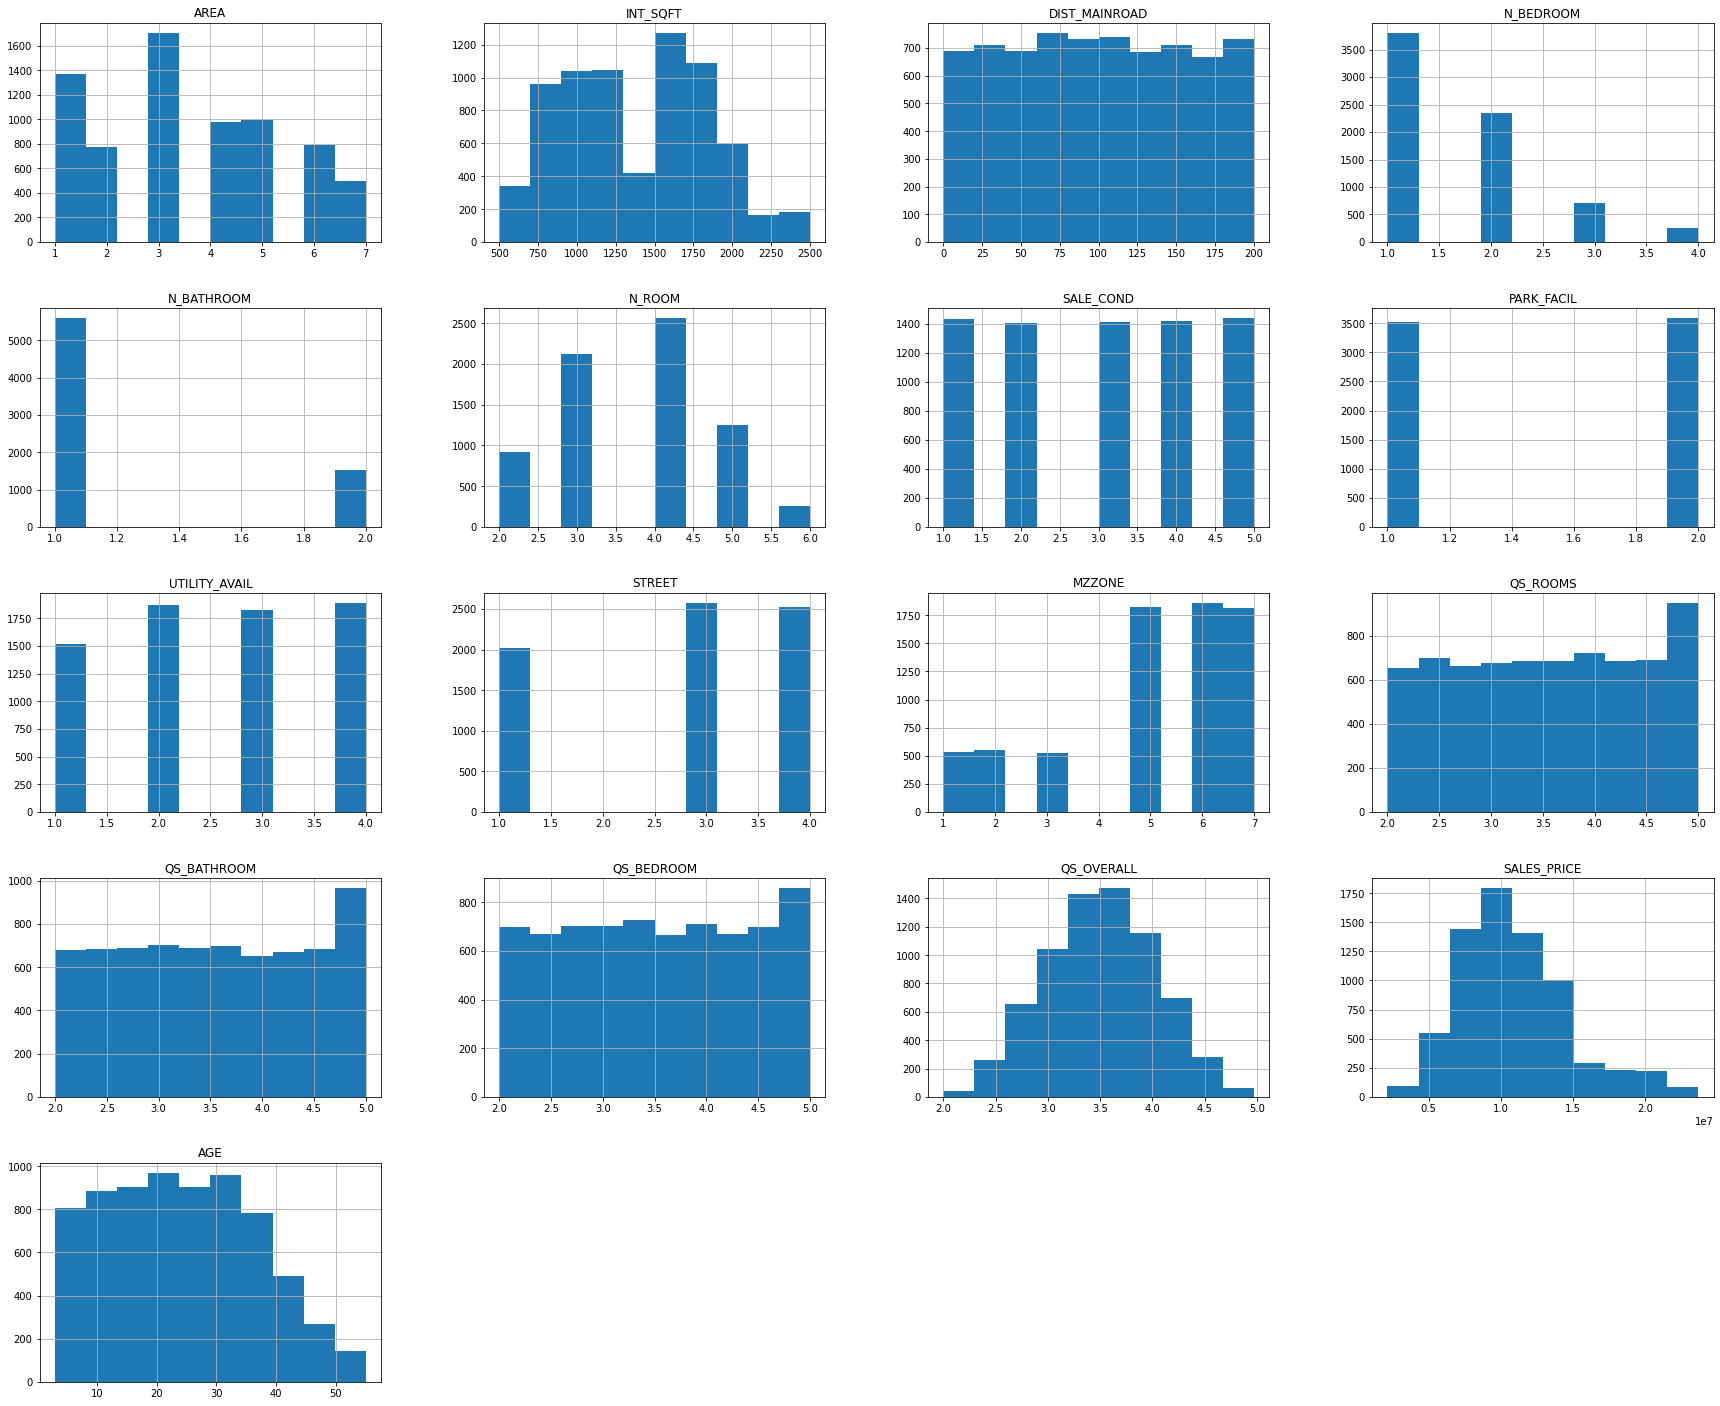

In [779]:
data.hist(bins=10,figsize=(30,25))
plt.show()

# *Drop unnecessary feature*

In [780]:
dummies1 = pd.get_dummies(data["BUILDTYPE"])
data= pd.concat([data,dummies1], axis=1)
data = data.drop('BUILDTYPE',axis=1)

In [781]:
data = data.drop(['DIST_MAINROAD','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL'],axis=1)

In [782]:
data.columns

Index(['AREA', 'INT_SQFT', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND',
       'PARK_FACIL', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'SALES_PRICE', 'AGE',
       'Commercial', 'House', 'Others'],
      dtype='object')

In [783]:
data.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,Commercial,House,Others
0,1,1004,1.0,1.0,3,3,2,4,3,1,7600000,44,1,0,0
1,6,1986,2.0,1.0,5,3,1,4,4,5,21717770,11,1,0,0
2,2,909,1.0,1.0,3,3,2,1,4,6,13159200,20,1,0,0
3,4,1855,3.0,2.0,5,2,1,3,3,3,9630290,22,0,0,1
4,1,1226,1.0,1.0,3,3,2,4,4,2,7406250,30,0,0,1


In [784]:
data.isnull().sum()

AREA             0
INT_SQFT         0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
SALES_PRICE      0
AGE              0
Commercial       0
House            0
Others           0
dtype: int64

In [785]:
X = data.drop('SALES_PRICE',axis = 1)
y = data['SALES_PRICE']

In [786]:
X.shape,y.shape

((7109, 14), (7109,))

# *Splitting and Scaling*

In [787]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state=0)

In [788]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_test)


[[ 0.78676154  2.06795583  2.95701614 ...  1.41851408 -0.72292726
  -0.69353413]
 [-0.29503558 -1.06706685 -0.79779574 ... -0.70496304  1.38326503
  -0.69353413]
 [ 0.78676154  1.74658321  1.70541218 ... -0.70496304 -0.72292726
   1.44189011]
 ...
 [ 0.78676154  1.54326584  1.70541218 ... -0.70496304  1.38326503
  -0.69353413]
 [ 0.24586298  0.81525848  0.45380822 ...  1.41851408 -0.72292726
  -0.69353413]
 [ 0.78676154  0.13753391  0.45380822 ...  1.41851408 -0.72292726
  -0.69353413]]
[[-0.29503558 -0.76974252 -0.79779574 ...  1.41851408 -0.72292726
  -0.69353413]
 [ 0.78676154  1.36618297  1.70541218 ... -0.70496304 -0.72292726
   1.44189011]
 [ 1.86855866  0.43267203 -0.79779574 ...  1.41851408 -0.72292726
  -0.69353413]
 ...
 [ 0.24586298  0.43267203  0.45380822 ...  1.41851408 -0.72292726
  -0.69353413]
 [ 1.3276601   0.58789282 -0.79779574 ...  1.41851408 -0.72292726
  -0.69353413]
 [-0.29503558 -0.61452174 -0.79779574 ... -0.70496304  1.38326503
  -0.69353413]]


In [789]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5687, 14), (1422, 14), (5687,), (1422,))


 ***Building the Model***

# *LINEAR REGRESSION*

In [790]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [791]:
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
from sklearn import metrics

In [792]:
lr_score = metrics.r2_score(y_test, y_pred)
lr_mae = metrics.mean_absolute_error(y_test, y_pred)
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))

Training score: 0.92
Test score: 0.92


In [793]:
print("R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred)))
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))

R2 score: 0.92
MSE: 1031790144055.47
MAE: 756896.57


In [794]:
from sklearn.metrics import r2_score
acc= r2_score(y_test,lr.predict(X_test))
acc

0.9240053972882452

In [795]:
lr_pre = pd.DataFrame({'actual_value':y_test,'predicted_value':y_pred})

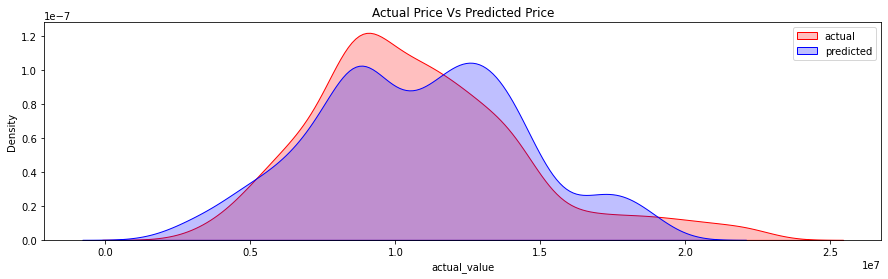

In [796]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=lr_pre, x='actual_value', label='actual', color = 'red',shade=True)
sns.kdeplot(data=lr_pre, x='predicted_value', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

The linear regression model has 92% r2 score The Actual price vs predicted price mostly same we perfectly fit the model

# *KNN Regressor*

cross validation score to find best value of k

In [797]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]:
  knn= KNeighborsRegressor(i)                #best value of k = 4, 0.9479184353354475
  knn.fit(X_train, y_train)
  print("K value  :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_train, y_train, cv=10)))

K value  : 1 Cross Value Accuracy : 0.9242147928985052
K value  : 2 Cross Value Accuracy : 0.9442230895602626
K value  : 3 Cross Value Accuracy : 0.949131182947141
K value  : 4 Cross Value Accuracy : 0.9492263227485696
K value  : 5 Cross Value Accuracy : 0.9483342389492829
K value  : 6 Cross Value Accuracy : 0.9471618963127579
K value  : 7 Cross Value Accuracy : 0.9455889953179341
K value  : 8 Cross Value Accuracy : 0.9448980980786379
K value  : 9 Cross Value Accuracy : 0.9437298340078039
K value  : 10 Cross Value Accuracy : 0.942860418177303
K value  : 20 Cross Value Accuracy : 0.9299931596941547
K value  : 30 Cross Value Accuracy : 0.9200181556373632
K value  : 40 Cross Value Accuracy : 0.9126579437353189
K value  : 50 Cross Value Accuracy : 0.9068763867435867


In [798]:
knn = KNeighborsRegressor(7)
knn.fit(X_train,y_train)
k_pred = knn.predict(X_test)

In [799]:
b = metrics.r2_score(y_test, k_pred)

In [800]:
knn_regressor = KNeighborsRegressor().fit(X_train, y_train)

knn_ypred = knn_regressor.predict(X_test)


print("KNN regressor train score: {:.2f}".format(knn_regressor.score(X_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_regressor.score(X_test, y_test)))
print("KNN r2 score: {:.2f}".format(b))

KNN regressor train score: 0.97
KNN regressor test score: 0.95
KNN r2 score: 0.95


It has really good r2 value.

In [801]:
k = pd.DataFrame({'actual_value':y_test,'predicted_value':k_pred})

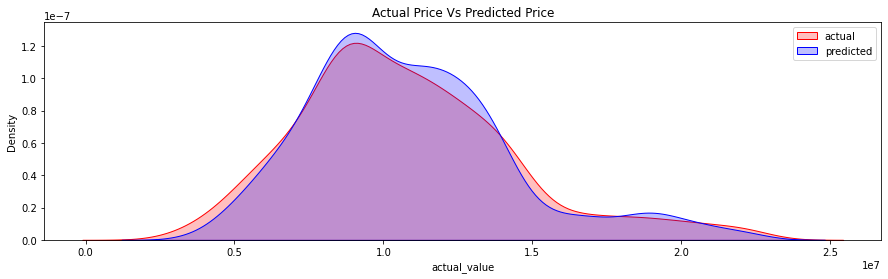

In [802]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=k, x='actual_value', label='actual', color = 'red',shade=True)
sns.kdeplot(data=k, x='predicted_value', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

# *Decision Tree Regression*

In [803]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60,70,100,150]:
  dt= DecisionTreeRegressor(max_depth= depth,random_state=0)
  dt.fit(X_train, y_train)
  accuracy= r2_score(y_test,dt.predict(X_test))
  val= cross_val_score(dt, X, y, cv=10)
  print('K:',depth,'R2 Score:',accuracy,'Cross Val Score:',np.mean(val))

K: 1 R2 Score: 0.3549736023125779 Cross Val Score: 0.3588875752516194
K: 2 R2 Score: 0.7003834039205055 Cross Val Score: 0.6819059001742293
K: 3 R2 Score: 0.8008214951832524 Cross Val Score: 0.8016324100218641
K: 4 R2 Score: 0.8807799567746913 Cross Val Score: 0.8820146308226893
K: 5 R2 Score: 0.9146638411022208 Cross Val Score: 0.9151939950985589
K: 6 R2 Score: 0.9370783882679491 Cross Val Score: 0.9358665043374771
K: 7 R2 Score: 0.9481395134303794 Cross Val Score: 0.9505404259155558
K: 8 R2 Score: 0.960324223329754 Cross Val Score: 0.9620416518309964
K: 9 R2 Score: 0.9664914978133411 Cross Val Score: 0.9689306927114822
K: 10 R2 Score: 0.9700621597718967 Cross Val Score: 0.9726599895067002
K: 20 R2 Score: 0.9739926978455751 Cross Val Score: 0.9761055339105045
K: 40 R2 Score: 0.9748459804044957 Cross Val Score: 0.9763157374751146
K: 60 R2 Score: 0.9748459804044957 Cross Val Score: 0.9763157374751146
K: 70 R2 Score: 0.9748459804044957 Cross Val Score: 0.9763157374751146
K: 100 R2 Score:

In [804]:
dt= DecisionTreeRegressor(max_depth= 20,random_state=0)
dt.fit(X_train, y_train)
pred= dt.predict(X_test)
accuracy= r2_score(y_test,pred)
print(accuracy)

0.9739926978455751


It has a excellent r2 value

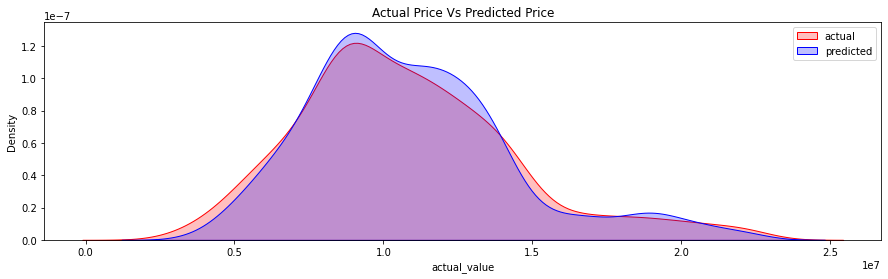

In [805]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=k, x='actual_value', label='actual', color = 'red',shade=True)
sns.kdeplot(data=k, x='predicted_value', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

The Decision Tree Regressor predicted value nearly equal to acutal value so the Decsion tree has better prediction model

# *Random Forest Regressor*

In [806]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
rf_regressor = RandomForestRegressor(random_state=0).fit(X_train, y_train)

rf_y_predict = rf_regressor.predict(X_test)
rf_score = metrics.r2_score(y_test, rf_y_predict)
rf_mae = metrics.mean_absolute_error(y_test, rf_y_predict)

In [807]:
print("Training data score for RF: {:.2f}".format(rf_regressor.score(X_train, y_train)))
print("Test data score for RF: {:.2f}".format(rf_regressor.score(X_test, y_test)))

Training data score for RF: 1.00
Test data score for RF: 0.99


In [808]:
print("RF R2 score: {:.3f}".format(metrics.r2_score(y_test, rf_y_predict)))
print("RF MSE: {:.2f}".format(metrics.mean_squared_error(y_test, rf_y_predict)))
print("RF MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, rf_y_predict)))

RF R2 score: 0.990
RF MSE: 129707375123.80
RF MAE: 282480.65


The Random forest regressor is more than Decision Tree Regressor 99% of R2 score

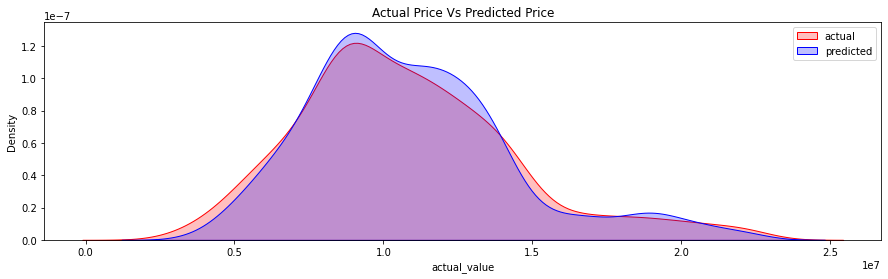

In [809]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=k, x='actual_value', label='actual', color = 'red',shade=True)
sns.kdeplot(data=k, x='predicted_value', label='predicted', color='blue', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

The graphs looks like the predicted price was nearly colose to acutal value Random Forest model perform better prediction of the model

*NOW LETS COMPARE ALL THE MODELS*

In [810]:
models = pd.DataFrame({'model_name':['LinearRegression','KNN','DecissionTree','RandomForest'],'r2_score':[0.92,0.95,0.97,0.99 ]})
models

,model_name,r2_score
0,LinearRegression,0.92
1,KNN,0.95
2,DecissionTree,0.97
3,RandomForest,0.99


**Suggestions to Real estate agents and buyers**

Profit can be increased by considering the following factors:

It is recommended to construct a commercial bulding rather than residential or others. 

Constructing buildings in T Nagar, Anna Nagar and KK Nagar can result in more profit.

It is highly recommended to construct buildings with Parking Facility. The Street of property should be Paved and it should have All Public facilites nearby.

Area is the Most important Feature for profitability, Area plays a crucial Role for deciding the best price of the houses. The area with more facilites will have higer price. The area with low facilites will have low price. In Chennai, T.Nagar has highest house price.

Buildtype is the second most important Feature for better investments. Commercial Houses are most expensive compared to normal house. Commercial buildings are hospitals, shopping malls,stores,IT companies etc., The investment of commercial building is more valuable than normal houses for the future profits.

As the square Footage of the house increases, the price of the house also increases. Square footage is essential for the viability of the investment.

Zone also plays a major role in deciding the house price. Commercial and Industrial zones are more profitable.

Price of the property changes due to various factors. Top factors are: Based on whether the property is Commercial,others or House Based on the location of the property. The price changes also on Availability of Parking. Finally based on the Zone which the property belongs to

CONCLUSIONS DRAWN FROM STUDY

More number of houses are sold in chrompet and karapakkam as they are more affordable

Houses in T.Nagar are highly expensive and sold less when compared to other housesand they are considered premium.

Houses in karapakkam and chrompet has more 1 and 2 bedrooms and sold more when comparing with others and its more budget friendly.

Houses in karapakkam , adayar and chrompet are small in size and KK Nagar has comparitively bigger houses and prices reflect it.

Houses with parking facilites are sold more when compared to houses with non parking facilities.

Commercial buildings are expensive than other type of buildings.

Houses with all the public facilites are sold comparively high.

Chrompet has highest number of houses with all the public facilities.

Most commercial houses are of paved street, and most house type houses has gravel street.

House price increases with the municipality zone.

Resenditial medium density zone has most expensive houses, whereas Agricultural zone has cheapest house.

                                                     **THANKYOU**